In [211]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# 모든단어사용

In [212]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

In [213]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [214]:
print(x_train[0])
print(x_test[0])

[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 18292, 159, 9, 1084, 363, 13, 19231, 71, 9, 16273, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 16273, 7, 748, 48, 9, 19231, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 23406, 28185, 5, 192,

In [215]:
print(y_train[0])
print(y_test[0])

3
3


In [216]:
num_classes = max(y_train) + 1
print('클래스의 수 : {}'.format(num_classes))

클래스의 수 : 46


훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


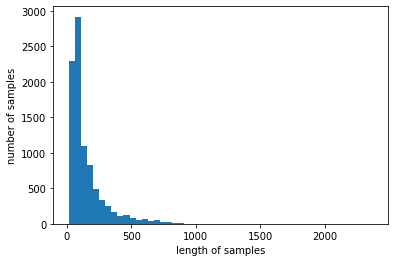

In [217]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

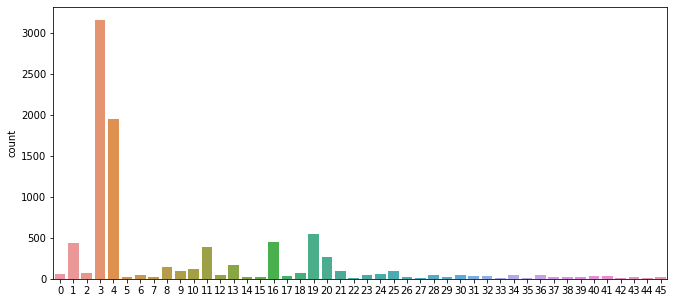

In [218]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train)
plt.show()

In [219]:
# 데이터 형태 확인
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

# 첫 번째 데이터 확인
print("Example x_train:", x_train[0][:10])  # x_train 첫 번째 데이터의 일부
print("Example y_train:", y_train[0])       # y_train 첫 번째 레이블

x_train shape: (8982,)
y_train shape: (8982,)
x_test shape: (2246,)
y_test shape: (2246,)
Example x_train: [1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207]
Example y_train: 3


In [220]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import reuters

# 숫자 리스트를 문자열로 변환
x_train_str = [' '.join(map(str, seq)) for seq in x_train]
x_test_str = [' '.join(map(str, seq)) for seq in x_test]

# Bag of Words (BOW) 변환
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train_str)  # 문자열 데이터로 변환된 훈련 데이터
x_test_dtm = dtmvector.transform(x_test_str)       # 문자열 데이터로 변환된 테스트 데이터

# TF-IDF 변환
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
tfidfv_test = tfidf_transformer.transform(x_test_dtm)

# Complement Naive Bayes 모델 학습
cb = ComplementNB()
cb.fit(tfidfv, y_train)

# 테스트 데이터 예측 및 정확도 계산
predicted = cb.predict(tfidfv_test)
print("정확도:", accuracy_score(y_test, predicted))

# F1-score 계산
f1_weighted = f1_score(y_test, predicted, average='weighted') 
print("F1-score (weighted 평균):", f1_weighted)


정확도: 0.7600178094390027
F1-score (weighted 평균): 0.7269431712065468


In [221]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

index_to_word = { index+3 : word for word, index in word_index.items() }

# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token


In [222]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [223]:
#test데이터도 변환해주세요!
decoded1 = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded1.append(t)

x_test = decoded1
print(len(x_test))

2246


In [224]:
x_train[:5]

['<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3',
 "<sos> generale de banque sa lt genb br and lt heller overseas corp of chicago have each taken 50 pct stakes in factoring company sa belgo factors generale de banque said in a statement it gave no financial details of the transaction sa belgo factors' turnover in 1986 was 17 5 billion belgian francs reuter 3",
 '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect th

In [225]:
x_test[:5]

['<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to accommodate growth and expansion plans for waldbaum inc and shopwell inc over the next two years a and p said the acquisition of shopwell in august 1986 and waldbaum in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt tengelmann warenhandelsgesellschaft of west germany reuter 3',
 "<sos> philippine sugar production in the 1987 88 crop year ending august has been set at 1 6 mln tonnes up from a provisional 1 3 mln tonnes this year sugar regulatory administration sra chairman arsenio yulo said yu

In [226]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

(8982, 26506)
(8982, 26506)


In [227]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산
from sklearn.metrics import f1_score

In [228]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

# F1-score 계산
f1_weighted = f1_score(y_test, predicted, average='weighted') 
print("F1-score (weighted 평균):", f1_weighted)

정확도: 0.7649154051647373
F1-score (weighted 평균): 0.7346534179503126


# 빈도수 상위 5,000개의 단어만 사용

In [229]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2)

In [230]:
# 데이터 형태 확인
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

# 첫 번째 데이터 확인
print("Example x_train:", x_train[0][:10])  # x_train 첫 번째 데이터의 일부
print("Example y_train:", y_train[0])       # y_train 첫 번째 레이블

x_train shape: (8982,)
y_train shape: (8982,)
x_test shape: (2246,)
y_test shape: (2246,)
Example x_train: [1, 2, 2, 8, 43, 10, 447, 5, 25, 207]
Example y_train: 3


In [231]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

index_to_word = { index+3 : word for word, index in word_index.items() }

# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token


In [232]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [233]:
#test데이터도 변환해주세요!
decoded1 = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded1.append(t)

x_test = decoded1
print(len(x_test))

2246


In [234]:
x_train[:5]

['<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3',
 '<sos> generale de banque sa lt <unk> <unk> and lt heller overseas corp of chicago have each taken 50 pct stakes in <unk> company sa <unk> factors generale de banque said in a statement it gave no financial details of the transaction sa <unk> <unk> turnover in 1986 was 17 5 billion belgian francs reuter 3',
 '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two fo

In [235]:
x_test[:5]

['<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to <unk> growth and expansion plans for <unk> inc and <unk> inc over the next two years a and p said the acquisition of <unk> in august 1986 and <unk> in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt <unk> <unk> of west germany reuter 3',
 "<sos> philippine sugar production in the 1987 88 crop year ending august has been set at 1 6 mln tonnes up from a provisional 1 3 mln tonnes this year sugar regulatory administration <unk> chairman <unk> <unk> said <unk> told reuters a survey during the curr

In [236]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

(8982, 4867)
(8982, 4867)


In [237]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

# F1-score 계산
f1_weighted = f1_score(y_test, predicted, average='weighted') 
print("F1-score (weighted 평균):", f1_weighted)

정확도: 0.7707034728406055
F1-score (weighted 평균): 0.7458990404916549


# 직접 단어 개수를 설정해서 사용(12500단어)

In [238]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=12500, test_split=0.2)

In [239]:
# 데이터 형태 확인
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

# 첫 번째 데이터 확인
print("Example x_train:", x_train[0][:10])  # x_train 첫 번째 데이터의 일부
print("Example y_train:", y_train[0])       # y_train 첫 번째 레이블

x_train shape: (8982,)
y_train shape: (8982,)
x_test shape: (2246,)
y_test shape: (2246,)
Example x_train: [1, 2, 2, 8, 43, 10, 447, 5, 25, 207]
Example y_train: 3


In [240]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

index_to_word = { index+3 : word for word, index in word_index.items() }

# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token


In [241]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [242]:
#test데이터도 변환해주세요!
decoded1 = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded1.append(t)

x_test = decoded1
print(len(x_test))

2246


In [243]:
x_train[:5]

['<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3',
 '<sos> generale de banque sa lt <unk> br and lt heller overseas corp of chicago have each taken 50 pct stakes in <unk> company sa <unk> factors generale de banque said in a statement it gave no financial details of the transaction sa <unk> <unk> turnover in 1986 was 17 5 billion belgian francs reuter 3',
 '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two for o

In [244]:
x_test[:5]

['<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to <unk> growth and expansion plans for <unk> inc and <unk> inc over the next two years a and p said the acquisition of <unk> in august 1986 and <unk> in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt <unk> <unk> of west germany reuter 3',
 "<sos> philippine sugar production in the 1987 88 crop year ending august has been set at 1 6 mln tonnes up from a provisional 1 3 mln tonnes this year sugar regulatory administration <unk> chairman <unk> yulo said yulo told reuters a survey during the curren

In [245]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

(8982, 11990)
(8982, 11990)


In [246]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

# F1-score 계산
f1_weighted = f1_score(y_test, predicted, average='weighted') 
print("F1-score (weighted 평균):", f1_weighted)

정확도: 0.7733748886910062
F1-score (weighted 평균): 0.7478467240937832


In [247]:
lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
lr.fit(tfidfv, y_train)

predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

# F1-score 계산
f1_weighted = f1_score(y_test, predicted, average='weighted') 
print("F1-score (weighted 평균):", f1_weighted)

정확도: 0.8107747105966162
F1-score (weighted 평균): 0.8052848494063323


In [248]:
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)

predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

# F1-score 계산
f1_weighted = f1_score(y_test, predicted, average='weighted') 
print("F1-score (weighted 평균):", f1_weighted)

정확도: 0.7747105966162066
F1-score (weighted 평균): 0.770502408009844


In [249]:

# 개별 모델 정의
log_reg = LogisticRegression(penalty='l2', random_state=0)
complement_nb = ComplementNB()
gb_clf = GradientBoostingClassifier(random_state=0)

# Voting Classifier 정의
voting_classifier = VotingClassifier(
    estimators=[('log_reg', log_reg), ('complement_nb', complement_nb), ('gb_clf', gb_clf)],
    voting='soft'
)

# 모델 학습
voting_classifier.fit(tfidfv, y_train)

predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

# F1-score 계산
f1_weighted = f1_score(y_test, predicted, average='weighted') 
print("F1-score (weighted 평균):", f1_weighted)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


정확도: 0.7956366874443455
F1-score (weighted 평균): 0.7915574443653677


# 딥러닝

In [253]:
import numpy as np
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score

# 1. 데이터 로드 및 전처리
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=12500, test_split=0.2)

# 시퀀스 길이를 동일하게 맞추기 (패딩)
max_len = 200  # 최대 시퀀스 길이
x_train_padded = pad_sequences(x_train, maxlen=max_len, padding='post')
x_test_padded = pad_sequences(x_test, maxlen=max_len, padding='post')

# 레이블 원-핫 인코딩
num_classes = np.max(y_train) + 1
y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

# 2. RNN 모델 정의
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=max_len),  # 임베딩 레이어
    SimpleRNN(units=64, return_sequences=False),  # RNN 레이어
    Dense(units=num_classes, activation='softmax')  # 출력층
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 3. 모델 학습
history = model.fit(x_train_padded, y_train_one_hot, epochs=20, batch_size=64, validation_split=0.2)

# 4. 모델 평가
predicted = model.predict(x_test_padded) #테스트 데이터에 대한 예측
y_pred_classes = np.argmax(predicted, axis=1)  # 소프트맥스 출력 -> 정수형 클래스 변환
print("정확도:", accuracy_score(y_test, y_pred_classes))  # 예측값과 실제값 비교

# F1-score 계산
f1_weighted = f1_score(y_test, y_pred_classes, average='weighted') 
print("F1-score (weighted 평균):", f1_weighted)


Epoch 1/20
113/113 [==============================] - 17s 146ms/step - loss: 2.6265 - accuracy: 0.3376 - val_loss: 2.3679 - val_accuracy: 0.3545
Epoch 2/20
113/113 [==============================] - 16s 143ms/step - loss: 2.3592 - accuracy: 0.3633 - val_loss: 2.3577 - val_accuracy: 0.3550
Epoch 3/20
113/113 [==============================] - 16s 144ms/step - loss: 2.3349 - accuracy: 0.3666 - val_loss: 2.3512 - val_accuracy: 0.3606
Epoch 4/20
113/113 [==============================] - 16s 145ms/step - loss: 2.2337 - accuracy: 0.4174 - val_loss: 2.3396 - val_accuracy: 0.3606
Epoch 5/20
113/113 [==============================] - 16s 144ms/step - loss: 2.0690 - accuracy: 0.4664 - val_loss: 2.3556 - val_accuracy: 0.3612
Epoch 6/20
113/113 [==============================] - 16s 144ms/step - loss: 1.9638 - accuracy: 0.4992 - val_loss: 2.3954 - val_accuracy: 0.3600
Epoch 7/20
113/113 [==============================] - 16s 145ms/step - loss: 1.8814 - accuracy: 0.5207 - val_loss: 2.4143 - val_ac